## **GRIP : The Sparks Foundation**<br>
**Data Science and Business Analytics intern**<br><br>
**Author : Praneeth Kumar Ketha**<br><br>
**Task 1 : Prediction Using Supervised ML**<br><br>
<br>In this we have to predict the percetange scored by a student based on number of hours they spend in studing. The task consists of two variables number of hours spend on study and percetage scored. This can be solved using Linear Regression 

importing required libraries for preprocessing data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline


Reading data from url

In [3]:
link = "http://bit.ly/w-data"
data_frame = pd.read_csv(link)

In [4]:
#Now lets see the head of our dataframe.
data_frame.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
#lets see the info of dataframe
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#checking the number of null values in our dataframe.
data_frame.isnull().sum()

Hours     0
Scores    0
dtype: int64

Let's check our data , and describe our data.

In [7]:
data_frame.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now, Lets visualize our data using scatter plot and observe relation between attributes.

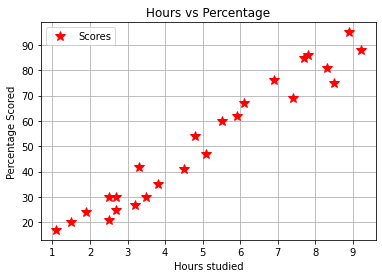

In [8]:
#plotting the distribution of scores.
data_frame.plot(x = "Hours", y = "Scores", style = '*', markersize = 10, color='red')
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")
plt.title("Hours vs Percentage")
plt.grid()
plt.show()

From the above graph we find out that there is a linear relationship between hours studied and percentage scored. Then we can use linear regression to predit our model.

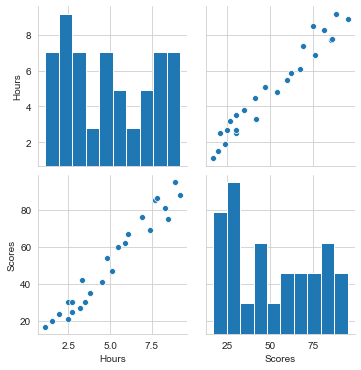

In [9]:
#plotting the possible plots inorder to find the realtionship among variables.
sns.set_style("whitegrid")
sns.pairplot(data_frame)

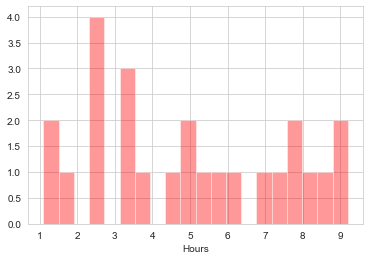

In [12]:
#lets draw a distribution plot of both the variables.
sns.set_style("whitegrid")
sns.distplot(data_frame['Hours'], kde = False, bins = 20, color = 'r')
plt.show()

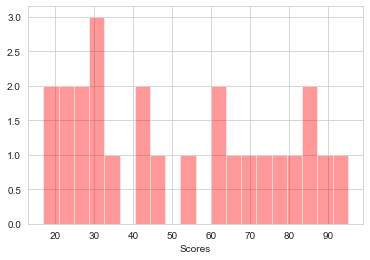

In [13]:
sns.set_style("whitegrid")
sns.distplot(data_frame['Scores'], kde = False, bins = 20, color ='r')
plt.show()

Data Prepration for linear model

dividing data into input varaible and output variable.
Our input variable in hours studied and output variable is percentage scored

In [14]:
# independent variable of our liniear equation.
x_values = data_frame.iloc[:,:-1].values
x_values

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
# dependent variable of our linear equation.
y_values = data_frame.iloc[:,1].values
y_values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [16]:
# dividing our data into testing data and training data.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.2, random_state = 101)

In [17]:
#lets checkout our train data
x_train

array([[4.8],
       [3.2],
       [8.5],
       [5.1],
       [1.1],
       [6.1],
       [2.5],
       [4.5],
       [1.5],
       [6.9],
       [2.7],
       [3.5],
       [8.3],
       [3.3],
       [2.7],
       [8.9],
       [7.8],
       [9.2],
       [1.9],
       [5.9]])

In [18]:
#Our test data
x_test

array([[2.5],
       [7.7],
       [3.8],
       [7.4],
       [5.5]])

In [19]:
y_train

array([54, 27, 75, 47, 17, 67, 21, 41, 20, 76, 30, 30, 81, 42, 25, 95, 86,
       88, 24, 62], dtype=int64)

In [20]:
y_test

array([30, 85, 35, 69, 60], dtype=int64)

### **Training Our Model**

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # initializing our linear regression.
regressor.fit(x_train,y_train)
print("Training of our model is finished")

Training of our model is finished


### **Visulalization Our Model**

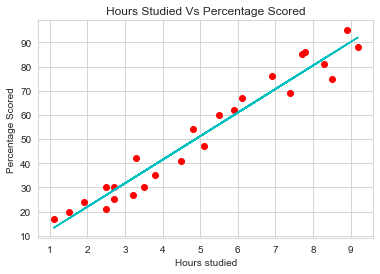

In [22]:
line = regressor.coef_ * x_values + regressor.intercept_
plt.scatter(x_values, y_values, color = 'r')
plt.plot(x_values,line, color = 'c')
plt.title("Hours Studied Vs Percentage Scored")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")
plt.show()

Another way of visualizing our linear model is using lmplot

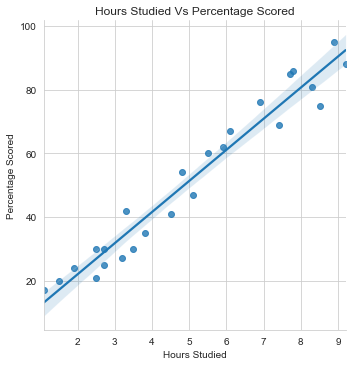

In [23]:
sns.lmplot(x = 'Hours', y = 'Scores', data = data_frame)
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.title("Hours Studied Vs Percentage Scored")
plt.show()

### **Making Predictions**

In [24]:
print(x_test)
y_pred = regressor.predict(x_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [25]:
df = pd.DataFrame({"Actual_vales":y_test , "Predicted_values" : y_pred})

In [26]:
#Comparing ytest and ypred
df

,Actual_vales,Predicted_values
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


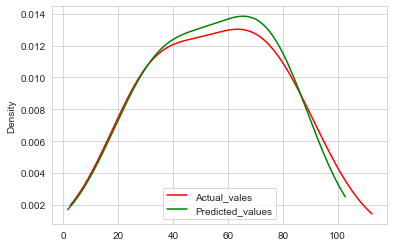

In [28]:
# visualizing actual and predicted values of dataframe.
df.plot(kind='kde', color = ['r','g'])
plt.show()

In [29]:
hours = [[9.25]]
our_predict = regressor.predict(hours)
print("Predicted Score for {} is : {}".format(hours[0][0],our_predict[0]))

Predicted Score for 9.25 is : 92.54521954029958


### **Evaluating Our Model**

In [30]:
#Mean Absolute Error metric of our model
from sklearn import metrics
print("Mean Abosulte Errorr : ",metrics.mean_absolute_error(y_test,y_pred))

Mean Abosulte Errorr :  4.937597792467706
